In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
figure_folder = 'figures/'

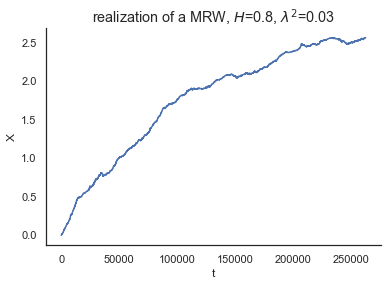

In [4]:
from pymultifracs.simul import mrw
import numpy as np

X = mrw(shape=2**18, H=0.8, lam=np.sqrt(0.03), L=2**18)

plt.plot(X)
plt.title(r'realization of a MRW, $H$=0.8, $\lambda^2$=0.03', size='large')
plt.ylabel('X')
plt.xlabel('t')
sns.despine()
plt.show()

In [5]:
from pymultifracs.wavelet import wavelet_analysis

In [31]:
WT = wavelet_analysis(X, p_exp=2, j1=3, j2=14)

ERROR! Session/line number was not unique in database. History logging moved to new session 182


In [32]:
coef_boot = WT.wt_coefs.bootstrap(100, 'db3', 3)

In [33]:
leader_boot = WT.wt_leaders.bootstrap(100, 'db3', 3)

In [34]:
from pymultifracs.mfa import mf_analysis

In [35]:
from pymultifracs.utils import build_q_log, get_filter_length

In [36]:
from pymultifracs.bootstrap import max_scale_bootstrap

In [37]:
scaling_ranges = [(3, 12)]

In [39]:
dwt, lwt = mf_analysis(WT.wt_coefs, WT.wt_leaders, scaling_ranges, weighted='bootstrap', n_cumul=3, q=None, bootstrap_weighted=None)

ERROR! Session/line number was not unique in database. History logging moved to new session 185


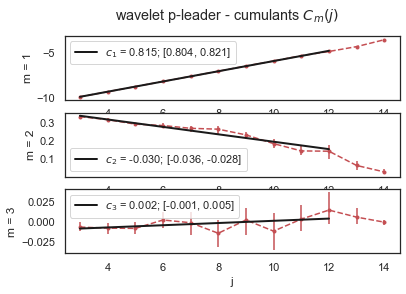

In [43]:
lwt.cumulants.plot(j1=3)

In [41]:
dwt1, lwt1 = mf_analysis(WT.wt_coefs, WT.wt_leaders, j1=2, weighted=True, n_cumul=3, q=None)

In [42]:
from typing import Tuple
def estimate_confidence_interval_from_bootstrap(
        bootstrap_estimates: np.ndarray,
        confidence_level: float = 95.0) \
        -> Tuple[float, float]:
    """
    This function estimates a confidence interval of an estimator given a
    variety of estimates of the same statistic from resampled data.
    Args:
        bootstrap_estimates: a NumPy array of dimension (B, ) containing the statistic
                    computed from resampled data
        confidence_level: the confidence level associated with the confidence
                          interval in percent (i.e. between 0 and 100)
    """

    percent = 100.0 - confidence_level
    bootstrap_confidence_interval \
        = (np.percentile(bootstrap_estimates, percent / 2.0, axis=-1),
           np.percentile(bootstrap_estimates, 100.0 - percent / 2.0, axis=-1))

    return bootstrap_confidence_interval

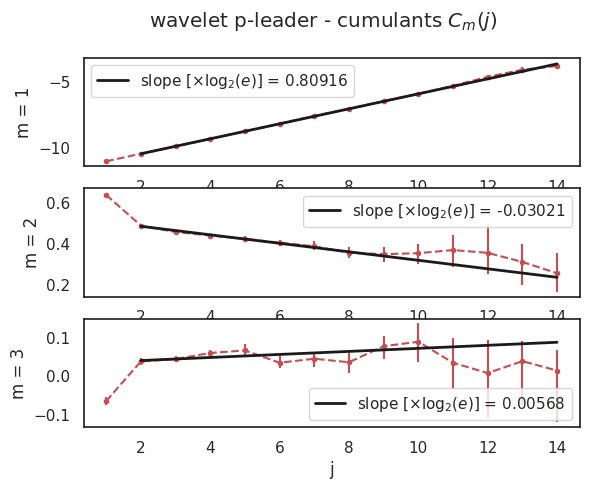

In [43]:
lwt1.cumulants.plot(cm_boot=lwt.cumulants)

In [68]:
import pandas as pd

In [76]:
df1 = pd.DataFrame(lwt1.cumulants.C2, lwt1.cumulants.j, ['est'])

In [77]:
df = pd.DataFrame(CI, lwt.cumulants.j, ['CI_lo', 'CI_hi'])

In [78]:
df.join(df1)

,CI_lo,CI_hi,est
2,0.409823,0.443453,0.427682
3,0.375947,0.409872,0.393274
4,0.341777,0.383074,0.364597
5,0.345677,0.389646,0.373013
6,0.327895,0.384836,0.358738
7,0.339635,0.413199,0.375578
8,0.281940,0.381566,0.329378
9,0.253409,0.364893,0.301224
10,0.204546,0.369407,0.280157
11,0.113603,0.346363,0.191650
